In [2]:
import pandas as pd
import numpy as np

import re
from bs4 import BeautifulSoup

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv(r"/train.csv")
df

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [5]:
df.shape

(404290, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [7]:
df.drop('qid1',axis = 1,inplace=True)
df.drop('qid2',axis = 1,inplace=True)
df.drop('id',axis = 1,inplace=True)

In [8]:
df.shape

(404290, 3)

In [9]:
df.describe()

,is_duplicate
count,404290.000000
mean,0.369198
std,0.482588
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [10]:
df.isnull().sum()

,0
question1,1
question2,2
is_duplicate,0


In [11]:
for i in range(0,5):
    print(df.question1[i])
    print(df.question2[i])
    print()

What is the step by step guide to invest in share market in india?
What is the step by step guide to invest in share market?

What is the story of Kohinoor (Koh-i-Noor) Diamond?
What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?

How can I increase the speed of my internet connection while using a VPN?
How can Internet speed be increased by hacking through DNS?

Why am I mentally very lonely? How can I solve it?
Find the remainder when [math]23^{24}[/math] is divided by 24,23?

Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?
Which fish would survive in salt water?



# Exploratory Data Analysis

In [12]:
Q_list = pd.concat([df['question1'] , df['question2']] )

unique_Q = Q_list.value_counts()[Q_list.value_counts()==1].index

duplicate_Q = Q_list.value_counts()[Q_list.value_counts()>1].index

print("Number of Questions which are unique: ",len(unique_Q))
print("Number of Questions which are repeated: ",len(duplicate_Q))
print("Total number of unique questions in dataset: ",len(Q_list.value_counts()))

Number of Questions which are unique:  425488
Number of Questions which are repeated:  111872
Total number of unique questions in dataset:  537360


**Repeated Questions**

In [13]:
rep_ques = Q_list.value_counts()[Q_list.value_counts()>1]
rep_ques[0:8]

,count
What are the best ways to lose weight?,161
How can you look at someone's private Instagram account without following them?,120
How can I lose weight quickly?,111
What's the easiest way to make money online?,88
Can you see who views your Instagram?,79
What are some things new employees should know going into their first day at AT&T?,77
What do you think of the decision by the Indian Government to demonetize 500 and 1000 rupee notes?,68
Which is the best digital marketing course?,66


### Identifying Questions types

In [14]:
# .tolist() method in Python is commonly used to convert data structures into Python lists

pair = pd.Series(df['question1'].tolist() + df['question2'].tolist()).astype(str)
pair.head(5)

,0
0,What is the step by step guide to invest in sh...
1,What is the story of Kohinoor (Koh-i-Noor) Dia...
2,How can I increase the speed of my internet co...
3,Why am I mentally very lonely? How can I solve...
4,"Which one dissolve in water quikly sugar, salt..."


In [15]:
qmarks = np.mean(pair.apply(lambda x: '?' in x))
math = np.mean(pair.apply(lambda x: '[math]' in x))
fullstop = np.mean(pair.apply(lambda x: '.' in x))
capital_first = np.mean(pair.apply(lambda x: x[0].isupper()))
numbers = np.mean(pair.apply(lambda x: max([y.isdigit() for y in x])))

print('Questions with question marks: {:.2f}%'.format(qmarks* 100 ))
print('Questions with [math] tags: {:.2f}%'.format(math * 100))
print('Questions with full stops: {:.2f}%'.format(fullstop * 100))
print('Questions with capitalised first letters: {:.2f}%'.format(capital_first * 100))
print('Questions with numbers: {:.2f}%'.format(numbers * 100))

Questions with question marks: 99.87%
Questions with [math] tags: 0.12%
Questions with full stops: 6.31%
Questions with capitalised first letters: 99.81%
Questions with numbers: 11.83%


In [16]:
df.duplicated().value_counts()


,count
False,404290


In [17]:
df.isna().sum()

,0
question1,1
question2,2
is_duplicate,0


In [18]:
df[df.question1.isna()]
df[df.question2.isna()]

,question1,question2,is_duplicate
105780,How can I develop android app?,NaN,0
201841,How can I create an Android app?,NaN,0


In [19]:
df = df.dropna(axis=0)
df.shape

(404287, 3)

## Imbalance in data

In [20]:
df.is_duplicate.value_counts(normalize=True)


,proportion
is_duplicate,
0,0.630799
1,0.369201


In [21]:
df.is_duplicate.value_counts()

,count
is_duplicate,
0,255024
1,149263


#Visualisation

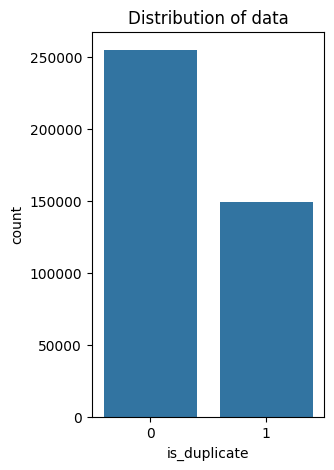

In [22]:
plt.figure(figsize=(3,5),dpi = 100)
plt.title('Distribution of data')
sns.countplot(x='is_duplicate', data=df);

* we can observe that there is an imbalance in our data.
* 63% of our data is non-similar data and 36% is similar data

## Text Preprocessing Steps

Text Preprocessing steps include some essential tasks to clean and remove the noise from the available data.

1. **Removing Special Characters and Punctuation**

2. **Converting to Lower Case** - We convert the whole text corpus to lower case to reduce the size of the vocabulary of our text data.

3. **Removing Stop Words** - Stopwords don't contribute to the meaning of a sentence. So, we can safely remove them without changing the meaning of the sentence. For eg: it, was, any, then, a, is, by, etc are the stopwords.

4. **Stemming** - Stemming is the process of getting the root form of a word. For eg: warm, warmer, warming can be converted to warm.

5. **Lemmatization** - Lemmatization takes a word and breaks it down to its lemma. For example, the verb "walk" might appear as "walking," "walks" or "walked." Inflectional endings such as "s," "ed" and "ing" are removed.
    Lemmatization groups these words as its lemma, "walk."

In [23]:

def preprocess(q):

    q = str(q).lower().strip()

    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')

    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')

    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\b1', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)

    # Decontracting words

    contractions = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")

    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()

    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()


    return q

In [24]:
# Applying text pre processing
df['question1'] = df['question1'].apply(preprocess)
df['question2'] = df['question2'].apply(preprocess)

## Data Preparation - Split the data into train and test set